In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import models, layers, losses

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


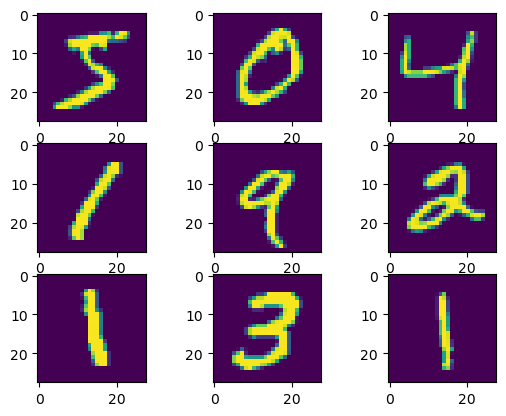

In [5]:
for i in range(9):
    plt.subplot(3,3, i+1),
    plt.imshow(x_train[i])
plt.show()

In [6]:
#normalize data
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
#build cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='sigmoid')
])




In [9]:
cnn.compile(optimizer='adam',
           loss=losses.sparse_categorical_crossentropy,
           metrics=['accuracy'])

In [10]:
cnn.fit(x_train, y_train, batch_size=20, epochs=10)

Epoch 1/10


2023-08-02 11:30:50.831140: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3000/3000 [==============================] - 14s 4ms/step - loss: 0.5984 - accuracy: 0.8025
Epoch 2/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2705 - accuracy: 0.9181
Epoch 3/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.2165 - accuracy: 0.9335
Epoch 4/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.1979 - accuracy: 0.9376
Epoch 5/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1834 - accuracy: 0.9429
Epoch 6/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1737 - accuracy: 0.9460
Epoch 7/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1620 - accuracy: 0.9485
Epoch 8/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1558 - accuracy: 0.9508
Epoch 9/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1509 - accuracy: 0.9512
Epoch 10/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.1495

In [11]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0382 - accuracy: 0.9913


[0.038165654987096786, 0.9912999868392944]

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

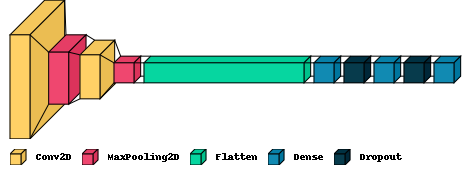

In [13]:
import visualkeras
visualkeras.layered_view(cnn, legend=True)

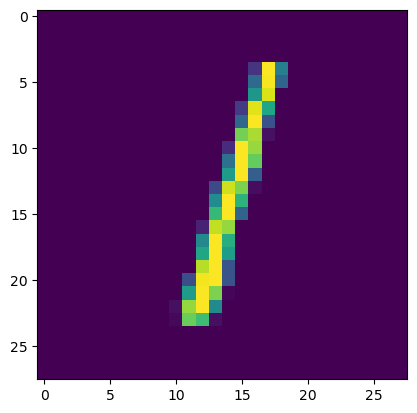

In [14]:
plt.imshow(x_test[2])

In [18]:
y_pred = cnn.predict(x_test)
y_pred = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


In [17]:
np.argmax(y_pred[2])

1

4

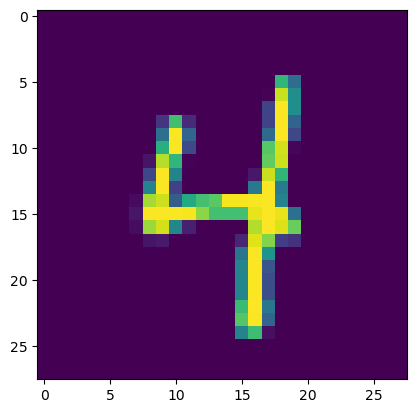

In [19]:

plt.imshow(x_test[19])
#np.argmax(y_pred[19])
y_pred[19]

The plot is number 6


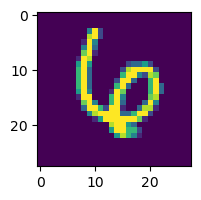

In [20]:
def plt_sample(x,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index]),
    #plt.xlabel(y_pred[index])
    print(f"The plot is number {y_pred[index]}")
    
plt_sample(x_test,22)
